<a href="https://colab.research.google.com/github/miracleosigwe/Jomac/blob/master/COVID_19_webscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import csv

In [ ]:
URL = "https://covid19.ncdc.gov.ng/"
r = requests.get(URL)
soup = BeautifulSoup(r.content, 'html5lib')

In [ ]:
table = soup.find('div', attrs = {'class':'table-responsive'})
val = table.find("table", attrs={'id': 'custom1'})
val = val.text.replace(',','')
val = val.replace(".", "")
row = val.splitlines()

In [ ]:
data_heading = ["States Affected", 
"No of Cases (Lab Confirmed", 
"No of Cases (on admission)", 
"No Discharged", 
"No of Deaths"]

#parsing through the scraped list 
data_lists = []

for x in row[14:]:
    new = []
    x = x.lstrip(" "*40)
    new.append(x)
    if x.isdigit():
        data_lists[-1].append(x)
    elif x.isalpha() or x.istitle():
        data_lists.append(new)
    else:
        continue

print(data_lists)

[['Lagos', '97157', '16330', '80066', '761'], ['FCT', '27769', '2727', '24801', '241'], ['Rivers', '15881', '351', '15376', '154'], ['Kaduna', '11042', '141', '10815', '86'], ['Plateau', '10223', '73', '10076', '74'], ['Oyo', '10127', '659', '9272', '196'], ['Edo', '7601', '158', '7135', '308'], ['Ogun', '5779', '99', '5598', '82'], ['Delta', '5072', '2406', '2556', '110'], ['Ondo', '5066', '373', '4593', '100'], ['Kano', '4874', '257', '4490', '127'], ['Akwa Ibom', '4615', '77', '4494', '44'], ['Kwara', '4495', '722', '3709', '64'], ['Osun', '3142', '69', '2984', '89'], ['Gombe', '2958', '180', '2715', '63'], ['Enugu', '2939', '17', '2893', '29'], ['Anambra', '2705', '8', '2678', '19'], ['Nasarawa', '2675', '291', '2345', '39'], ['Katsina', '2399', '23', '2339', '37'], ['Imo', '2335', '48', '2230', '57'], ['Abia', '2145', '14', '2097', '34'], ['Benue', '2118', '329', '1764', '25'], ['Ebonyi', '2064', '28', '2004', '32'], ['Ekiti', '1960', '88', '1844', '28'], ['Bauchi', '1910', '60', 

In [ ]:
filename = 'covid_data.csv'
with open(filename, 'w', newline='') as file:
    write = csv.writer(file,data_heading)
    for lists in data_lists:
        write.writerow(lists)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(filename, names=data_heading)

In [ ]:
data.head()

,States Affected,No of Cases (Lab Confirmed,No of Cases (on admission),No Discharged,No of Deaths
0,Lagos,97157,16330,80066,761
1,FCT,27769,2727,24801,241
2,Rivers,15881,351,15376,154
3,Kaduna,11042,141,10815,86
4,Plateau,10223,73,10076,74


In [ ]:
#second method
#read the table directly using pandas

df_table = pd.read_html(URL)
df_table

[   States Affected  No. of Cases (Lab Confirmed)  ...  No. Discharged  No. of Deaths
 0            Lagos                         98458  ...           80066            769
 1              FCT                         28212  ...           27578            247
 2           Rivers                         16449  ...           16185            154
 3           Kaduna                         11188  ...           11080             88
 4          Plateau                         10227  ...           10149             75
 5              Oyo                         10196  ...            9878            201
 6              Edo                          7672  ...            7335            321
 7             Ogun                          5798  ...            5705             82
 8            Delta                          5328  ...            5170            111
 9             Ondo                          5143  ...            4673            107
 10            Kano                          4927  ...

In [ ]:
df_table[0][:]

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,98458,17623,80066,769
1,FCT,28212,387,27578,247
2,Rivers,16449,110,16185,154
3,Kaduna,11188,20,11080,88
4,Plateau,10227,3,10149,75
5,Oyo,10196,117,9878,201
6,Edo,7672,16,7335,321
7,Ogun,5798,11,5705,82
8,Delta,5328,47,5170,111
9,Ondo,5143,363,4673,107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df_table[0])
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,98458,17623,80066,769
1,FCT,28212,387,27578,247
2,Rivers,16449,110,16185,154
3,Kaduna,11188,20,11080,88
4,Plateau,10227,3,10149,75
5,Oyo,10196,117,9878,201
6,Edo,7672,16,7335,321
7,Ogun,5798,11,5705,82
8,Delta,5328,47,5170,111
9,Ondo,5143,363,4673,107


In [ ]:
columns = df.columns
x_axis = columns[0]
y_axis = list(columns[1:])

print(x_axis)
print()
print(y_axis)

States Affected

['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


Text(0.5, 0, 'States Affected')

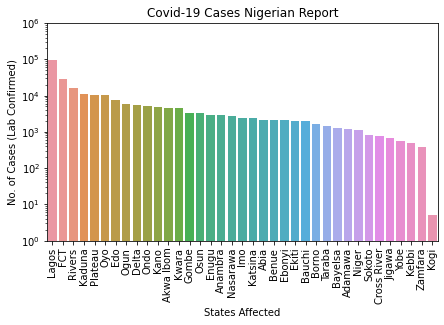

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

#plotting 1
plt.title("Covid-19 Cases Nigerian Report")
plot = sns.barplot(data=df, x=x_axis, y=y_axis[0])
plot.set_yscale("log")
plot.set_ylim(1, 1000000)
plt.xlabel(x_axis)

Text(0.5, 0, 'States Affected')

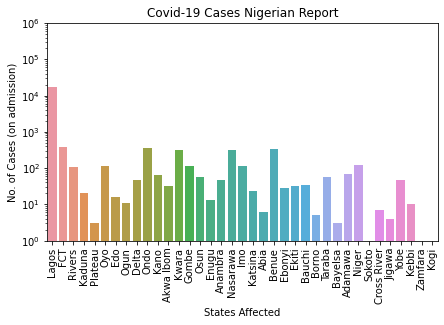

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

#plotting 2
plt.title("Covid-19 Cases Nigerian Report")
plot = sns.barplot(data=df, x=x_axis, y=y_axis[1])
plot.set_yscale("log")
plot.set_ylim(1, 1000000)
plt.xlabel(x_axis)

Text(0.5, 0, 'States Affected')

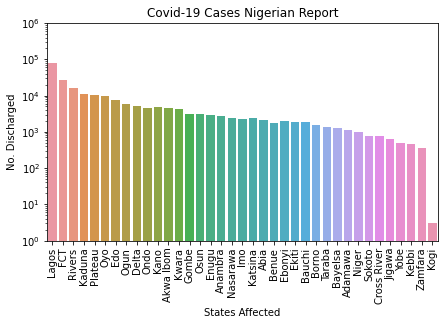

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

#plotting 3
plt.title("Covid-19 Cases Nigerian Report")
plot = sns.barplot(data=df, x=x_axis, y=y_axis[2])
plot.set_yscale("log")
plot.set_ylim(1, 1000000)
plt.xlabel(x_axis)

Text(0.5, 0, 'States Affected')

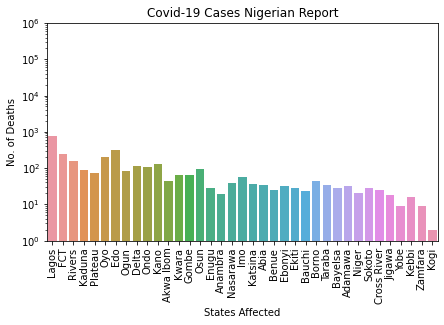

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

#plotting 4
plt.title("Covid-19 Cases Nigerian Report")
plot = sns.barplot(data=df, x=x_axis, y=y_axis[3])
plot.set_yscale("log")
plot.set_ylim(1, 1000000)
plt.xlabel(x_axis)

UFuncTypeError: ignored

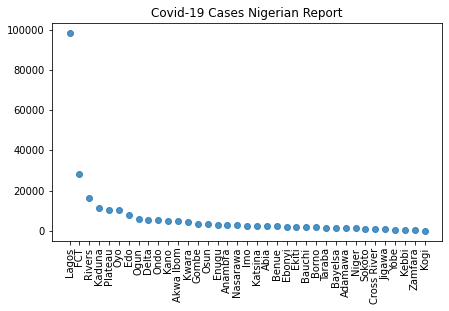

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

#plotting 1
plt.title("Covid-19 Cases Nigerian Report")
plot = sns.regplot(data=df, x=x_axis, y=y_axis[0])
#plot.set_yscale("log")
#plot.set_ylim(1, 1000000)
plt.xlabel(x_axis)